# Calculating VBS Mass Fractions across Model Domain

Script for determining average VBS compounds mass fractions (in relation to total condensed VBS mass) for use in determining boundary conditions for the model.

### Load modules and data

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from matplotlib import ticker

import xarray as xr
import numpy as np
import pandas as pd
import re

In [2]:
file_path = '/Volumes/Work_Space/PROMOTE/PROMOTE-data/May_2015-MOZART_boundary_no_dust-correct_dust_emiss-no_BB-x3_VBS_emissions/'
#datadask = xr.open_mfdataset('nh3nn_v2_2_20120[12]*nc')
datadask = xr.open_mfdataset(file_path+'wrfout_d01_2015-05-06*')

### Regular Expressions for identifying VBS compounds

In [166]:
### create the regular expression for matching VBS condensed-phase compounds
## format: [o]pcg[1-9]_f_[co]_[a|cw]0[1-8]    e.g. opcg1_f_c_a01, pcg4_f_o_cw04
vbs_cond_pr  = re.compile("^o*pcg[1-9]_f_[co]_(a|cw)0[1-8]$")
vbs_gas_pr   = re.compile("^o*pcg[1-9]_f_[co]$")
vbs_rep_pr   = re.compile("(a|cw)0[1-8]$")
vbs_clump_pr = re.compile("^o*pcg[1-9]_f_[co]_aero$")

### Conversion factor, ppmv to ug/kg_dryair

In [4]:
molar_mass_dryair = 28.97 # g/mol
molar_mass_VBS    = 250.0 # g/mol
ppm_to_ppb        = 1000.0
convert_ppm_ugkg  = ppm_to_ppb * (molar_mass_VBS / molar_mass_dryair)

### Combining VBS data to create lumped products  

In [41]:
#### works - but is much slower than method below
#cline = ''
#opr = ''
#for varname, da in datadask.data_vars.items():
#    mt = pr.match(varname)
#    if mt:
#        cline += opr+'datadask.'+varname
#        opr = ' + '
#
#datadask['vbs_aerosol'] = eval(cline)      

In [126]:
## summing up vbs aerosol and gas totals
datadask['vbs_aerosol'] = datadask.oc_a01 * 0.0
datadask['vbs_gas']     = datadask.oc_a01 * 0.0

datadask['pcg1_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg1_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg2_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg2_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg3_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg3_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg4_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg4_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg5_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg5_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg6_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg6_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg7_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg7_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg8_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg8_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['pcg9_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['pcg9_f_o_aero'] = datadask.oc_a01 * 0.0

datadask['opcg1_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg1_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg2_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg2_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg3_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg3_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg4_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg4_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg5_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg5_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg6_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg6_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg7_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg7_f_o_aero'] = datadask.oc_a01 * 0.0
datadask['opcg8_f_c_aero'] = datadask.oc_a01 * 0.0
datadask['opcg8_f_o_aero'] = datadask.oc_a01 * 0.0


for varname, da in datadask.data_vars.items():
    match_condensed = vbs_cond_pr.match(varname)
    match_gasphase  = vbs_gas_pr.match(varname)
    if match_condensed:
        print('adding to vbs_aerosol: '+varname)
        datadask['vbs_aerosol'] += da
        aero_lumped_name = vbs_rep_pr.sub('aero',varname)
        datadask[aero_lumped_name] += da
    elif match_gasphase:
        print('adding to vbs_gas: '+varname)
        datadask['vbs_gas'] += da


adding to vbs_gas: pcg1_f_c
adding to vbs_gas: pcg2_f_c
adding to vbs_gas: pcg3_f_c
adding to vbs_gas: pcg4_f_c
adding to vbs_gas: pcg5_f_c
adding to vbs_gas: pcg6_f_c
adding to vbs_gas: pcg7_f_c
adding to vbs_gas: pcg8_f_c
adding to vbs_gas: pcg9_f_c
adding to vbs_gas: pcg1_f_o
adding to vbs_gas: pcg2_f_o
adding to vbs_gas: pcg3_f_o
adding to vbs_gas: pcg4_f_o
adding to vbs_gas: pcg5_f_o
adding to vbs_gas: pcg6_f_o
adding to vbs_gas: pcg7_f_o
adding to vbs_gas: pcg8_f_o
adding to vbs_gas: pcg9_f_o
adding to vbs_gas: opcg1_f_c
adding to vbs_gas: opcg2_f_c
adding to vbs_gas: opcg3_f_c
adding to vbs_gas: opcg4_f_c
adding to vbs_gas: opcg5_f_c
adding to vbs_gas: opcg6_f_c
adding to vbs_gas: opcg7_f_c
adding to vbs_gas: opcg8_f_c
adding to vbs_gas: opcg1_f_o
adding to vbs_gas: opcg2_f_o
adding to vbs_gas: opcg3_f_o
adding to vbs_gas: opcg4_f_o
adding to vbs_gas: opcg5_f_o
adding to vbs_gas: opcg6_f_o
adding to vbs_gas: opcg7_f_o
adding to vbs_gas: opcg8_f_o
adding to vbs_aerosol: pcg1_f_c_

adding to vbs_aerosol: opcg5_f_o_a06
adding to vbs_aerosol: opcg6_f_o_a06
adding to vbs_aerosol: opcg7_f_o_a06
adding to vbs_aerosol: opcg8_f_o_a06
adding to vbs_aerosol: pcg1_f_c_a07
adding to vbs_aerosol: pcg2_f_c_a07
adding to vbs_aerosol: pcg3_f_c_a07
adding to vbs_aerosol: pcg4_f_c_a07
adding to vbs_aerosol: pcg5_f_c_a07
adding to vbs_aerosol: pcg6_f_c_a07
adding to vbs_aerosol: pcg7_f_c_a07
adding to vbs_aerosol: pcg8_f_c_a07
adding to vbs_aerosol: pcg9_f_c_a07
adding to vbs_aerosol: pcg1_f_o_a07
adding to vbs_aerosol: pcg2_f_o_a07
adding to vbs_aerosol: pcg3_f_o_a07
adding to vbs_aerosol: pcg4_f_o_a07
adding to vbs_aerosol: pcg5_f_o_a07
adding to vbs_aerosol: pcg6_f_o_a07
adding to vbs_aerosol: pcg7_f_o_a07
adding to vbs_aerosol: pcg8_f_o_a07
adding to vbs_aerosol: pcg9_f_o_a07
adding to vbs_aerosol: opcg1_f_c_a07
adding to vbs_aerosol: opcg2_f_c_a07
adding to vbs_aerosol: opcg3_f_c_a07
adding to vbs_aerosol: opcg4_f_c_a07
adding to vbs_aerosol: opcg5_f_c_a07
adding to vbs_aeros

adding to vbs_aerosol: pcg6_f_o_cw05
adding to vbs_aerosol: pcg7_f_o_cw05
adding to vbs_aerosol: pcg8_f_o_cw05
adding to vbs_aerosol: pcg9_f_o_cw05
adding to vbs_aerosol: opcg1_f_c_cw05
adding to vbs_aerosol: opcg2_f_c_cw05
adding to vbs_aerosol: opcg3_f_c_cw05
adding to vbs_aerosol: opcg4_f_c_cw05
adding to vbs_aerosol: opcg5_f_c_cw05
adding to vbs_aerosol: opcg6_f_c_cw05
adding to vbs_aerosol: opcg7_f_c_cw05
adding to vbs_aerosol: opcg8_f_c_cw05
adding to vbs_aerosol: opcg1_f_o_cw05
adding to vbs_aerosol: opcg2_f_o_cw05
adding to vbs_aerosol: opcg3_f_o_cw05
adding to vbs_aerosol: opcg4_f_o_cw05
adding to vbs_aerosol: opcg5_f_o_cw05
adding to vbs_aerosol: opcg6_f_o_cw05
adding to vbs_aerosol: opcg7_f_o_cw05
adding to vbs_aerosol: opcg8_f_o_cw05
adding to vbs_aerosol: pcg1_f_c_cw06
adding to vbs_aerosol: pcg2_f_c_cw06
adding to vbs_aerosol: pcg3_f_c_cw06
adding to vbs_aerosol: pcg4_f_c_cw06
adding to vbs_aerosol: pcg5_f_c_cw06
adding to vbs_aerosol: pcg6_f_c_cw06
adding to vbs_aerosol:

### Calculating Mean Values over Region of Interest

Convert from ppm to ug/kg for gas-phase species too.

In [129]:
### calculate the mean values for all compounds
sn_slice = slice(35,100)
we_slice = slice(17,70)
vert_slice = slice(7,10)

vbs_mean = {}
vbs_mean['vbs_aerosol'] = datadask['vbs_aerosol'].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).mean().values * 1.0
vbs_mean['vbs_gas'] = datadask['vbs_gas'].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).mean().values * convert_ppm_ugkg 

for varname, da in datadask.data_vars.items():
    match_condensed = vbs_cond_pr.match(varname)
    match_cond_lumped = vbs_clump_pr.match(varname)
    match_gasphase  = vbs_gas_pr.match(varname)
    if match_condensed or match_cond_lumped: 
        print('processing aero '+varname)
        vbs_mean[varname] = datadask[varname].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).mean().values * 1.0
    elif match_gasphase:
        print('processing gas '+varname)
        vbs_mean[varname] = datadask[varname].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).mean().values * convert_ppm_ugkg


processing gas pcg1_f_c
processing gas pcg2_f_c
processing gas pcg3_f_c
processing gas pcg4_f_c
processing gas pcg5_f_c
processing gas pcg6_f_c
processing gas pcg7_f_c
processing gas pcg8_f_c
processing gas pcg9_f_c
processing gas pcg1_f_o
processing gas pcg2_f_o
processing gas pcg3_f_o
processing gas pcg4_f_o
processing gas pcg5_f_o
processing gas pcg6_f_o
processing gas pcg7_f_o
processing gas pcg8_f_o
processing gas pcg9_f_o
processing gas opcg1_f_c
processing gas opcg2_f_c
processing gas opcg3_f_c
processing gas opcg4_f_c
processing gas opcg5_f_c
processing gas opcg6_f_c
processing gas opcg7_f_c
processing gas opcg8_f_c
processing gas opcg1_f_o
processing gas opcg2_f_o
processing gas opcg3_f_o
processing gas opcg4_f_o
processing gas opcg5_f_o
processing gas opcg6_f_o
processing gas opcg7_f_o
processing gas opcg8_f_o
processing aero pcg1_f_c_a01
processing aero pcg2_f_c_a01
processing aero pcg3_f_c_a01
processing aero pcg4_f_c_a01
processing aero pcg5_f_c_a01
processing aero pcg6_f_

processing aero opcg1_f_c_a08
processing aero opcg2_f_c_a08
processing aero opcg3_f_c_a08
processing aero opcg4_f_c_a08
processing aero opcg5_f_c_a08
processing aero opcg6_f_c_a08
processing aero opcg7_f_c_a08
processing aero opcg8_f_c_a08
processing aero opcg1_f_o_a08
processing aero opcg2_f_o_a08
processing aero opcg3_f_o_a08
processing aero opcg4_f_o_a08
processing aero opcg5_f_o_a08
processing aero opcg6_f_o_a08
processing aero opcg7_f_o_a08
processing aero opcg8_f_o_a08
processing aero pcg1_f_c_cw01
processing aero pcg2_f_c_cw01
processing aero pcg3_f_c_cw01
processing aero pcg4_f_c_cw01
processing aero pcg5_f_c_cw01
processing aero pcg6_f_c_cw01
processing aero pcg7_f_c_cw01
processing aero pcg8_f_c_cw01
processing aero pcg9_f_c_cw01
processing aero pcg1_f_o_cw01
processing aero pcg2_f_o_cw01
processing aero pcg3_f_o_cw01
processing aero pcg4_f_o_cw01
processing aero pcg5_f_o_cw01
processing aero pcg6_f_o_cw01
processing aero pcg7_f_o_cw01
processing aero pcg8_f_o_cw01
processing

processing aero opcg1_f_c_cw08
processing aero opcg2_f_c_cw08
processing aero opcg3_f_c_cw08
processing aero opcg4_f_c_cw08
processing aero opcg5_f_c_cw08
processing aero opcg6_f_c_cw08
processing aero opcg7_f_c_cw08
processing aero opcg8_f_c_cw08
processing aero opcg1_f_o_cw08
processing aero opcg2_f_o_cw08
processing aero opcg3_f_o_cw08
processing aero opcg4_f_o_cw08
processing aero opcg5_f_o_cw08
processing aero opcg6_f_o_cw08
processing aero opcg7_f_o_cw08
processing aero opcg8_f_o_cw08
processing aero pcg1_f_c_aero
processing aero pcg1_f_o_aero
processing aero pcg2_f_c_aero
processing aero pcg2_f_o_aero
processing aero pcg3_f_c_aero
processing aero pcg3_f_o_aero
processing aero pcg4_f_c_aero
processing aero pcg4_f_o_aero
processing aero pcg5_f_c_aero
processing aero pcg5_f_o_aero
processing aero pcg6_f_c_aero
processing aero pcg6_f_o_aero
processing aero pcg7_f_c_aero
processing aero pcg7_f_o_aero
processing aero pcg8_f_c_aero
processing aero pcg8_f_o_aero
processing aero pcg9_f_c

### Determine Mass Fractions Maps (only needed for plotting data)

In [6]:
### calculate the mass fractions across the map
for varname, da in datadask.data_vars.items():
    match_condensed = vbs_cond_pr.match(varname)
    match_gasphase  = vbs_gas_pr.match(varname)
    if match_condensed:
        datadask[varname+'_mass_frac'] = datadask[varname]/datadask['vbs_aerosol']
    elif match_gasphase:
        datadask[varname+'_mass_frac'] = datadask[varname]*convert_ppm_ugkg/datadask['vbs_aerosol']


In [7]:
datadask['vbs_gas_aero_ratio'] = datadask['vbs_gas']*convert_ppm_ugkg/datadask['vbs_aerosol']

In [101]:
var = 'vbs_gas_aero_ratio'
sn_slice = slice(35,100)
we_slice = slice(17,70)
vert_slice = slice(7,10)

maxval = datadask[var].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).max(dim=['Time','south_north','west_east'])
minval = datadask[var].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).min(dim=['Time','south_north','west_east'])
meanval = datadask[var].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).mean(dim=['Time','south_north','west_east'])
stdval = datadask[var].isel(south_north=sn_slice,west_east=we_slice,bottom_top=vert_slice).std(dim=['Time','south_north','west_east'])
#medval = datadask.vbs_aerosol.median() ## median is not yet available for dask arrays

### Calculate Ratios to Total VBS aerosol for Area-averaged VBS compounds

In [165]:
total_aero = 0.0
total_gas  = 0.0

for varname in vbs_mean:
    match_cond_lumped = vbs_clump_pr.match(varname)
    match_gasphase  = vbs_gas_pr.match(varname)
    if match_cond_lumped or match_gasphase:
        ratio = vbs_mean[varname]/vbs_mean['vbs_aerosol']
        print('ratio of '+varname+' to VBS aerosol is '+np.array2string(ratio,formatter={'float_kind':lambda ratio: "%3.3e" % ratio}))
        if match_cond_lumped:
            total_aero += ratio
        else:
            total_gas += ratio

print('total aerosol ratio = '+np.array2string(total_aero,formatter={'float_kind':lambda total_aero: "%3.3e" % total_aero}))
print('total gas ratio = '+np.array2string(total_gas,formatter={'float_kind':lambda total_gas: "%3.3e" % total_gas}))

ratio of pcg1_f_c to VBS aerosol is 1.062e-05
ratio of pcg2_f_c to VBS aerosol is 5.251e-05
ratio of pcg3_f_c to VBS aerosol is 3.279e-04
ratio of pcg4_f_c to VBS aerosol is 7.252e-04
ratio of pcg5_f_c to VBS aerosol is 1.095e-03
ratio of pcg6_f_c to VBS aerosol is 1.995e-03
ratio of pcg7_f_c to VBS aerosol is 2.750e-03
ratio of pcg8_f_c to VBS aerosol is 3.533e-03
ratio of pcg9_f_c to VBS aerosol is 5.661e-03
ratio of pcg1_f_o to VBS aerosol is 3.422e-06
ratio of pcg2_f_o to VBS aerosol is 1.674e-05
ratio of pcg3_f_o to VBS aerosol is 1.088e-04
ratio of pcg4_f_o to VBS aerosol is 2.448e-04
ratio of pcg5_f_o to VBS aerosol is 3.691e-04
ratio of pcg6_f_o to VBS aerosol is 6.743e-04
ratio of pcg7_f_o to VBS aerosol is 9.314e-04
ratio of pcg8_f_o to VBS aerosol is 1.199e-03
ratio of pcg9_f_o to VBS aerosol is 1.927e-03
ratio of opcg1_f_c to VBS aerosol is 5.459e-05
ratio of opcg2_f_c to VBS aerosol is 1.161e-03
ratio of opcg3_f_c to VBS aerosol is 8.481e-03
ratio of opcg4_f_c to VBS aeros

### Plotting data

In [94]:
sn_slice = slice(35,100)
we_slice = slice(17,70)
time_slice = 0
vert_slice = 10

Text(0.5,1,'vbs_gas_aero_ratio')

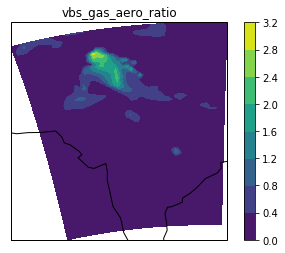

In [95]:
var = 'vbs_gas_aero_ratio'

xlong = datadask.XLONG.isel(Time=1,south_north=sn_slice,west_east=we_slice)
xlat = datadask.XLAT.isel(Time=1,south_north=sn_slice,west_east=we_slice)
plot_var = datadask[var].isel(Time=time_slice,bottom_top=vert_slice,south_north=sn_slice,west_east=we_slice)

ax = plt.axes(projection=ccrs.PlateCarree())
#ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()
plt.contourf(xlong,xlat,plot_var)
plt.colorbar()
plt.title(var)

Text(0.5,1,'vbs_aerosol')

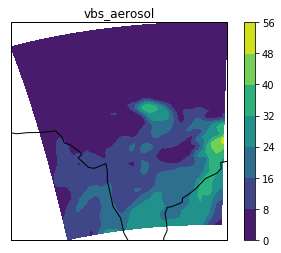

In [96]:
var = 'vbs_aerosol'

xlong = datadask.XLONG.isel(Time=1,south_north=sn_slice,west_east=we_slice)
xlat = datadask.XLAT.isel(Time=1,south_north=sn_slice,west_east=we_slice)
plot_var = datadask[var].isel(Time=time_slice,bottom_top=vert_slice,south_north=sn_slice,west_east=we_slice)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.contourf(xlong,xlat,plot_var)
plt.colorbar()
plt.title(var)

Text(0.5,1,'vbs_gas')

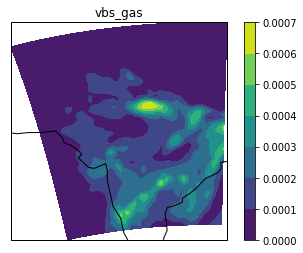

In [97]:
var = 'vbs_gas'

xlong = datadask.XLONG.isel(Time=1,south_north=sn_slice,west_east=we_slice)
xlat = datadask.XLAT.isel(Time=1,south_north=sn_slice,west_east=we_slice)
plot_var = datadask[var].isel(Time=time_slice,bottom_top=vert_slice,south_north=sn_slice,west_east=we_slice)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.contourf(xlong,xlat,plot_var)
plt.colorbar()
plt.title(var)